In [1]:
import os
import random
import time
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import tqdm

In [2]:
#这部分已经分好词的话就不用做了
def load_preprocess(path):
    # 正式开始，首先是读取文件
    with open(path, 'r', errors='ignore') as f:
        lines = f.readlines()
    # 第二部分，去除其中的非文本部分
    stop = set(stopwords.words('english')) 
    res = []
    wnl = WordNetLemmatizer()
    for data in lines:
        data = data.replace('\n', '')
        filter_sentence = [w for w in data.split(' ') if w not in stopwords.words('english') and w != '' and (not w.isdigit())]
        # 第四部分，词型还原
        filter_sentence = [wnl.lemmatize(i) for i in filter_sentence]
        text = ' '.join(filter_sentence)
        res.append(text)
    return res

In [3]:
def process_data(data_path):
    
    text = load_preprocess(data_path)
    
    return text

In [4]:
# with open('./wiki.txt','r',encoding='utf8') as f:
#     lines = f.readlines()
# tar = './wiki_sep.txt'
# tar = open(tar,'w',encoding='utf8')
# stop = set(stopwords.words('english'))
# wnl = WordNetLemmatizer()
# for line in tqdm.tqdm(lines):
#     data = line.replace('/n','')
#     filter_sentence = [w for w in data.split(' ') if w not in stopwords.words('english') and w != '' and (not w.isdigit())]
#     filter_sentence = [wnl.lemmatize(i) for i in filter_sentence]
#     text = ' '.join(filter_sentence)
#     tar.writelines(text)

In [23]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')# 忽略警告

import logging
import os.path
import sys
import multiprocessing

from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
    
program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s',level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

# inp为输入语料, outp1 为输出模型, outp2为原始c版本word2vec的vector格式的模型
inp = './pubmed_sep.txt'
outp1 = './pubmed.model'
outp2 = './pubmed.vector'

# 训练skip-gram模型
model = Word2Vec(LineSentence(inp), vector_size=400, window=5, min_count=5,
                 workers=multiprocessing.cpu_count())

# 保存模型
model.save(outp1)
model.wv.save_word2vec_format(outp2, binary=False)

2021-05-26 02:58:38,616: INFO: running /home/lthpc/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/dzh/.local/share/jupyter/runtime/kernel-8b5b92bf-b3e7-44d2-9ffe-e4d9eb4ddf95.json
2021-05-26 02:58:38,618: INFO: collecting all words and their counts
2021-05-26 02:58:38,620: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-26 02:58:38,784: INFO: PROGRESS: at sentence #10000, processed 319616 words, keeping 22228 word types
2021-05-26 02:58:38,940: INFO: PROGRESS: at sentence #20000, processed 702170 words, keeping 32802 word types
2021-05-26 02:58:39,124: INFO: PROGRESS: at sentence #30000, processed 1147862 words, keeping 41186 word types
2021-05-26 02:58:39,296: INFO: PROGRESS: at sentence #40000, processed 1570010 words, keeping 47392 word types
2021-05-26 02:58:39,438: INFO: PROGRESS: at sentence #50000, processed 1981996 words, keeping 53350 word types
2021-05-26 02:58:39,564: INFO: PROGRESS: at sentence #60000, processed 2314055 

2021-05-26 02:58:52,864: INFO: EPOCH 1 - PROGRESS: at 33.04% examples, 580817 words/s, in_qsize 77, out_qsize 0
2021-05-26 02:58:53,902: INFO: EPOCH 1 - PROGRESS: at 38.08% examples, 588545 words/s, in_qsize 94, out_qsize 0
2021-05-26 02:58:54,919: INFO: EPOCH 1 - PROGRESS: at 43.32% examples, 600615 words/s, in_qsize 92, out_qsize 0
2021-05-26 02:58:55,923: INFO: EPOCH 1 - PROGRESS: at 48.34% examples, 610122 words/s, in_qsize 93, out_qsize 0
2021-05-26 02:58:57,068: INFO: EPOCH 1 - PROGRESS: at 53.11% examples, 611822 words/s, in_qsize 95, out_qsize 0
2021-05-26 02:58:58,069: INFO: EPOCH 1 - PROGRESS: at 56.59% examples, 607200 words/s, in_qsize 95, out_qsize 0
2021-05-26 02:58:59,094: INFO: EPOCH 1 - PROGRESS: at 60.94% examples, 608489 words/s, in_qsize 92, out_qsize 2
2021-05-26 02:59:00,107: INFO: EPOCH 1 - PROGRESS: at 65.39% examples, 616733 words/s, in_qsize 89, out_qsize 1
2021-05-26 02:59:01,123: INFO: EPOCH 1 - PROGRESS: at 69.92% examples, 618289 words/s, in_qsize 93, out_

2021-05-26 02:59:26,871: INFO: worker thread finished; awaiting finish of 47 more threads
2021-05-26 02:59:26,874: INFO: worker thread finished; awaiting finish of 46 more threads
2021-05-26 02:59:26,895: INFO: worker thread finished; awaiting finish of 45 more threads
2021-05-26 02:59:26,907: INFO: worker thread finished; awaiting finish of 44 more threads
2021-05-26 02:59:26,913: INFO: worker thread finished; awaiting finish of 43 more threads
2021-05-26 02:59:26,916: INFO: worker thread finished; awaiting finish of 42 more threads
2021-05-26 02:59:26,933: INFO: worker thread finished; awaiting finish of 41 more threads
2021-05-26 02:59:26,936: INFO: worker thread finished; awaiting finish of 40 more threads
2021-05-26 02:59:26,940: INFO: worker thread finished; awaiting finish of 39 more threads
2021-05-26 02:59:26,965: INFO: worker thread finished; awaiting finish of 38 more threads
2021-05-26 02:59:26,987: INFO: worker thread finished; awaiting finish of 37 more threads
2021-05-26

2021-05-26 02:59:47,475: INFO: worker thread finished; awaiting finish of 30 more threads
2021-05-26 02:59:47,478: INFO: worker thread finished; awaiting finish of 29 more threads
2021-05-26 02:59:47,481: INFO: worker thread finished; awaiting finish of 28 more threads
2021-05-26 02:59:47,493: INFO: worker thread finished; awaiting finish of 27 more threads
2021-05-26 02:59:47,496: INFO: worker thread finished; awaiting finish of 26 more threads
2021-05-26 02:59:47,518: INFO: worker thread finished; awaiting finish of 25 more threads
2021-05-26 02:59:47,522: INFO: worker thread finished; awaiting finish of 24 more threads
2021-05-26 02:59:47,528: INFO: worker thread finished; awaiting finish of 23 more threads
2021-05-26 02:59:47,537: INFO: worker thread finished; awaiting finish of 22 more threads
2021-05-26 02:59:47,544: INFO: worker thread finished; awaiting finish of 21 more threads
2021-05-26 02:59:47,551: INFO: worker thread finished; awaiting finish of 20 more threads
2021-05-26

2021-05-26 03:00:08,090: INFO: worker thread finished; awaiting finish of 12 more threads
2021-05-26 03:00:08,091: INFO: worker thread finished; awaiting finish of 11 more threads
2021-05-26 03:00:08,091: INFO: worker thread finished; awaiting finish of 10 more threads
2021-05-26 03:00:08,098: INFO: worker thread finished; awaiting finish of 9 more threads
2021-05-26 03:00:08,100: INFO: worker thread finished; awaiting finish of 8 more threads
2021-05-26 03:00:08,101: INFO: worker thread finished; awaiting finish of 7 more threads
2021-05-26 03:00:08,103: INFO: worker thread finished; awaiting finish of 6 more threads
2021-05-26 03:00:08,106: INFO: worker thread finished; awaiting finish of 5 more threads
2021-05-26 03:00:08,107: INFO: worker thread finished; awaiting finish of 4 more threads
2021-05-26 03:00:08,110: INFO: worker thread finished; awaiting finish of 3 more threads
2021-05-26 03:00:08,111: INFO: worker thread finished; awaiting finish of 2 more threads
2021-05-26 03:00:0

2021-05-26 03:00:28,583: INFO: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=50380, vector_size=400, alpha=0.025)', 'datetime': '2021-05-26T03:00:28.583733', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'created'}
2021-05-26 03:00:28,638: INFO: Word2Vec lifecycle event {'fname_or_handle': './pubmed.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-05-26T03:00:28.638933', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'saving'}
2021-05-26 03:00:28,640: INFO: storing np array 'vectors' to ./pubmed.model.wv.vectors.npy
2021-05-26 03:00:28,707: INFO: storing np array 'syn1neg' to ./pubmed.model.syn1neg.npy
2021-05-26 03:00:28,762: INFO: not storing attribute cum_table
2021-05-26 03:00:28,785: INFO: saved ./pubmed.model
2021-05

In [18]:
import gensim

In [19]:
model = gensim.models.KeyedVectors.load_word2vec_format('wiki.vector', binary=False)

2021-05-26 02:55:36,462: INFO: loading projection weights from wiki.vector
2021-05-26 02:57:34,985: INFO: KeyedVectors lifecycle event {'msg': 'loaded (291161, 400) matrix of type float32 from wiki.vector', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-05-26T02:57:34.984801', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'load_word2vec_format'}


In [22]:
model.similar_by_word("bike")

[('bicycle', 0.7692288160324097),
 ('motorcycle', 0.645075798034668),
 ('biking', 0.5875848531723022),
 ('scooter', 0.5790697932243347),
 ('bicycling', 0.5657639503479004),
 ('moped', 0.5506284832954407),
 ('motorcyclist', 0.5401747226715088),
 ('motocross', 0.53692227602005),
 ('bmx', 0.5349506735801697),
 ('motorbike', 0.5328401923179626)]

In [26]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('./pubmed.vector',binary=False)

2021-05-26 03:31:27,513: INFO: loading projection weights from ./pubmed.vector
2021-05-26 03:31:48,244: INFO: KeyedVectors lifecycle event {'msg': 'loaded (50380, 400) matrix of type float32 from ./pubmed.vector', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-05-26T03:31:48.244272', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'load_word2vec_format'}


In [27]:
model.similar_by_word('eye')

[('ocular', 0.588353157043457),
 ('cornea', 0.5742526054382324),
 ('fellow', 0.543906569480896),
 ('glaucomatous', 0.5303398370742798),
 ('aphakic', 0.5275589227676392),
 ('lid', 0.5183647274971008),
 ('lens', 0.516416609287262),
 ('foveal', 0.5131872296333313),
 ('eyelid', 0.5113928914070129),
 ('iris', 0.5095874667167664)]

In [28]:
model.similar_by_word('headache')

[('migraine', 0.791481614112854),
 ('dizziness', 0.7738164663314819),
 ('vertigo', 0.7571958899497986),
 ('hallucination', 0.7446308135986328),
 ('complained', 0.7372879385948181),
 ('complaint', 0.7355597019195557),
 ('nausea', 0.7256589531898499),
 ('palpitation', 0.7243956923484802),
 ('neurosis', 0.7237755060195923),
 ('restlessness', 0.7222596406936646)]

In [29]:
model.similar_by_word('induction')

[('inducing', 0.5138829350471497),
 ('inducer', 0.5050511360168457),
 ('induced', 0.4919183552265167),
 ('suppression', 0.4826423227787018),
 ('inducible', 0.45676249265670776),
 ('inducibility', 0.4565184414386749),
 ('induce', 0.4547732174396515),
 ('priming', 0.45313555002212524),
 ('triggering', 0.43927666544914246),
 ('expression', 0.43342849612236023)]

In [30]:
model.similar_by_word("effect")

[('influence', 0.6521956324577332),
 ('action', 0.5688385963439941),
 ('exerted', 0.5100044012069702),
 ('exerts', 0.46737760305404663),
 ('potentiation', 0.46187281608581543),
 ('antagonism', 0.444062739610672),
 ('synergism', 0.43511271476745605),
 ('additive', 0.433000385761261),
 ('stimulatory', 0.4262302815914154),
 ('enhancement', 0.42510825395584106)]

In [31]:
model.similar_by_word('biochemical')

[('biophysical', 0.6352120637893677),
 ('neurochemical', 0.5856583118438721),
 ('enzymological', 0.5729345679283142),
 ('morphological', 0.5607656836509705),
 ('morphologic', 0.555529773235321),
 ('immunologic', 0.5413727760314941),
 ('electrophysiologic', 0.5325297713279724),
 ('haematological', 0.5238599181175232),
 ('electrophysiological', 0.5199149250984192),
 ('correlative', 0.5117566585540771)]

In [33]:
model.similar_by_word('hormone')

[('hormon', 0.6341941952705383),
 ('thyrotropin', 0.6187419891357422),
 ('hgh', 0.6035255789756775),
 ('prolactin', 0.5991007089614868),
 ('gonadotropin', 0.5789690017700195),
 ('gh', 0.5696380138397217),
 ('tsh', 0.5681326389312744),
 ('prl', 0.5663697719573975),
 ('calcitonin', 0.5654944181442261),
 ('gonadotrophin', 0.5604019165039062)]

In [34]:
word_list = ['eye','headache','induction','effect','biochemical','hormone']

In [35]:
train_feature=[]
for word in word_list:
    similar_words = model.similar_by_word(word)
    for similar_word in similar_words:
        train_feature.append(model.get_vector(similar_word[0]))
    train_feature.append(model.get_vector(word))
train_feature = np.array(train_feature)

In [36]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score ,calinski_harabasz_score,davies_bouldin_score
from sklearn.manifold import TSNE

In [37]:
pred_kmeans_20 = KMeans(n_clusters=6, init='k-means++').fit_predict(train_feature)
print('use normal kmeans with k=6:')
print('silhouette_score = ', silhouette_score(train_feature, pred_kmeans_20))
print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_kmeans_20))
print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_kmeans_20))

use normal kmeans with k=6:
silhouette_score =  0.2327444
calinski_harabasz_score =  9.676143360145554
davies_bouldin_score =  1.6460293803439576


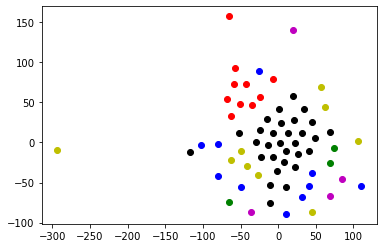

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

X_embedded = TSNE(n_components=2,early_exaggeration=6).fit_transform(train_feature)
for i in range(len(X_embedded)):
    if pred_kmeans_20[i]==0:
        plt.scatter(X_embedded[i][0],X_embedded[i][1],c='r')
    elif pred_kmeans_20[i]==1:
        plt.scatter(X_embedded[i][0],X_embedded[i][1],c='b')
    elif pred_kmeans_20[i]==2:
        plt.scatter(X_embedded[i][0],X_embedded[i][1],c='g')
    elif pred_kmeans_20[i]==3:
        plt.scatter(X_embedded[i][0],X_embedded[i][1],c='y')
    elif pred_kmeans_20[i]==4:
        plt.scatter(X_embedded[i][0],X_embedded[i][1],c='k')
    elif pred_kmeans_20[i]==5:
        plt.scatter(X_embedded[i][0],X_embedded[i][1],c='m')
        
plt.show()

In [134]:
pred_minibatch_1000 = MiniBatchKMeans(n_clusters=6, init='k-means++', batch_size=5).fit_predict(train_feature)
print('use minibatch kmeans with batch=1000:')
print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_1000))
print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_1000))
print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_1000))

pred_minibatch_1500 = MiniBatchKMeans(n_clusters=6, init='k-means++', batch_size=10).fit_predict(train_feature)
print('use minibatch kmeans with batch=1500:')
print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_1500))
print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_1500))
print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_1500))

pred_minibatch_2000 = MiniBatchKMeans(n_clusters=6, init='k-means++', batch_size=15).fit_predict(train_feature)
print('use minibatch kmeans with batch=2000:')
print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_2000))
print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_2000))
print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_2000))

pred_minibatch_3000 = MiniBatchKMeans(n_clusters=6, init='k-means++', batch_size=1).fit_predict(train_feature)
print('use minibatch kmeans with batch=3000:')
print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_3000))
print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_3000))
print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_3000))

use minibatch kmeans with batch=1000:
silhouette_score =  0.23838435
calinski_harabasz_score =  14.995393258072076
davies_bouldin_score =  1.3988289061663408
use minibatch kmeans with batch=1500:
silhouette_score =  0.28567255
calinski_harabasz_score =  17.356873622236673
davies_bouldin_score =  1.3262099959112683
use minibatch kmeans with batch=2000:
silhouette_score =  0.26255274
calinski_harabasz_score =  16.522001121104886
davies_bouldin_score =  1.3715271702770566
use minibatch kmeans with batch=3000:
silhouette_score =  0.27011454
calinski_harabasz_score =  17.10502376050917
davies_bouldin_score =  1.361862517443534
